In [1]:
import numpy as np
import pickle
import keras
from keras import models, optimizers, layers, regularizers
from keras.models import model_from_json
from sklearn.metrics import cohen_kappa_score
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config = config)
import matplotlib.pyplot as plt

IMG_SIZE = 256

Using TensorFlow backend.


#### Define Useful Model Methods

In [2]:
# Save baseline model architecture and weights
def save_base(model_name):
    model_str = str(input("Save model as: "))

    # serialize model to JSON
    model_name = baseline.to_json()
    with open("CNN Models/" + model_str + ".json", "w") as json_file:
        json_file.write(model_name)

    # serialize weights to HDF5
    baseline.save_weights("CNN Models/" + model_str + ".h5")
    print("Saved " + model_str + " and weights to CNN Models folder")
    
# Save Comparison model
def save_model(model_name):
    model_str = str(input("Save model as: "))

    # serialize model to JSON
    model_name = model.to_json()
    with open("CNN Models/" + model_str + ".json", "w") as json_file:
        json_file.write(model_name)

    # serialize weights to HDF5
    model.save_weights("CNN Models/" + model_str + ".h5")
    print("Saved " + model_str + " and weights to CNN Models folder")
    
# Load model architecture and weights NOTE: must compile again
def load_model():
    model_str = str(input("Name of model to load: "))

    # load json and create model
    json_file = open('CNN Models/' + model_str + '.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("CNN Models/" + model_str + ".h5")
    print("Loaded " + model_str + " and weights from CNN Models folder")
    
    return loaded_model

# Write history object to a file using pickle
def save_history(model_name):
    hist_str = str(input("Save history as: "))

    pickle.dump(model_name.history, open('Training Histories/'+ hist_str + '.p', 'wb'))
    
    print("Saved " + hist_str + " to Training Histories folder")
    
# Load history object
def load_history():
    hist_str = str(input("Name of history to load: "))

    loaded_history = pickle.load(open('Training Histories/' + hist_str + '.p', 'rb'))
    
    print("Loaded " + hist_str + " from Training Histories folder")
    
    return loaded_history

###### Load Images & Labels

In [3]:
training_img_1 = pickle.load(open('training_img_1.p', 'rb'))
training_img_2 = pickle.load(open('training_img_2.p', 'rb'))
training_img = np.append(training_img_1, training_img_2, axis = 0)

test_img = pickle.load(open('pickle_test_img.p', 'rb'))

training_labels = pickle.load(open('training_labels.p', 'rb'))
test_labels = pickle.load(open('test_labels.p', 'rb'))

print(training_img.shape, 
     training_labels.shape,
     test_img.shape,
     test_labels.shape)

(100908, 256, 256, 1) (100908, 15) (11212, 256, 256, 1) (11212, 15)


In [7]:
# Load baseline history
base_hist = load_history()

Name of history to load: VGG_Doppleganger_40e
Loaded VGG_Doppleganger_40e from Training Histories folder


# Comparison Model

In [27]:
# VGG_Doppleganger version 1.0
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(16, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(layers.Conv2D(16, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Block 2
model.add(layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SpatialDropout2D(0.5, data_format = 'channels_last'))

# Block 3
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Block 4
model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Block 5
model.add(layers.Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

# Output Block
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(15, activation='sigmoid'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 254, 254, 16)      160       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 252, 252, 16)      2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 124, 124, 32)      4640      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 122, 122, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
spatial_dropout2d_2 (Spatial (None, 61, 61, 32)        0         
__________

In [12]:
# Optional: load model architecture
model = load_model()
model.compile(optimizer = optimizers.RMSprop(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])

Name of model to load: vanilla_VGG_Dropouts_30e
Loaded vanilla_VGG_Dropouts_30e and weights from CNN Models folder


In [ ]:
model_history = model.fit(training_img, training_labels, epochs = 20, validation_split = (1 / 9), batch_size = 256, verbose = 1)

###### Evaluate

In [13]:
model_test = model.evaluate(test_img, test_labels)
print(model_test)

11212/11212 [==============================] - 10s 896us/step
[0.19035274120492252, 0.9352598472914013]


###### Save History

In [ ]:
save_history(model_history)

In [ ]:
# Optional: save model architecture
save_model(model)

In [5]:
model_history = load_history()

Name of history to load: VGG_Doppleganger_v2_history
Loaded VGG_Doppleganger_v2_history from Training Histories folder


#### Plot Results Compared To Baseline

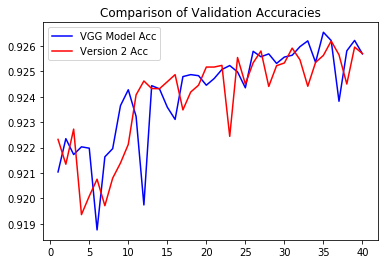

<Figure size 432x288 with 0 Axes>

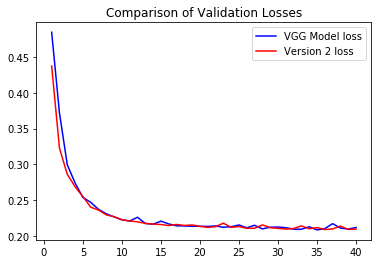

<Figure size 432x288 with 0 Axes>

In [9]:
base_acc = base_hist['val_acc']
model_acc = model_history['val_acc']
epochs = range(1, len(model_acc) + 1)
plt.plot(epochs, base_acc, 'b', label='VGG Model Acc')
plt.plot(epochs, model_acc, 'r', label='Version 2 Acc')
plt.title('Comparison of Validation Accuracies')
plt.legend()
plt.figure()

plt.show()
# Optional: save plot
#Todo

base_loss = base_hist['val_loss']
model_loss = model_history['val_loss']
plt.plot(epochs, base_loss, 'b', label='VGG Model loss')
plt.plot(epochs, model_loss, 'r', label='Version 2 loss')
plt.title('Comparison of Validation Losses')
plt.legend()
plt.figure()

# Optional: save plot
#Todo

plt.show()

### Compare Two Models

In [25]:
# Optional: load model to see summary and/or compile for evaluation
loaded_model = load_model()
loaded_model.summary()

Name of model to load: VGG_Doppleganger


FileNotFoundError: [Errno 2] No such file or directory: 'CNN Models/VGG_Doppleganger.json'

In [22]:
loaded_model.compile(optimizer = optimizers.RMSprop(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])
model_test = loaded_model.predict(test_img)
print(model_test)

#cohen_kappa_score(test_labels, np.round_(loaded_model.predict(test_img)))

[[3.1256057e-02 4.4091318e-02 4.9514906e-04 ... 6.8828878e-03
  4.9342297e-04 3.0027062e-04]
 [1.5629595e-03 1.2427293e-03 3.9353645e-03 ... 1.4123497e-04
  3.4550761e-03 2.4734036e-05]
 [3.0304424e-02 3.9984754e-01 1.7623631e-02 ... 2.4618881e-02
  7.6639937e-04 1.9657754e-03]
 ...
 [4.2836568e-01 1.5509651e-03 4.0680027e-04 ... 8.9339772e-03
  3.6270620e-05 5.6127971e-04]
 [1.3405432e-04 1.6784259e-04 3.8272337e-05 ... 1.3900290e-03
  2.0784899e-04 4.4793622e-03]
 [3.4367386e-02 2.9097188e-03 1.5090992e-04 ... 6.4148818e-04
  9.4094482e-04 4.3673743e-04]]


In [14]:
# Optional: load history to plot and compare models
loaded_hist = load_history()

model_history = load_history()

Name of history to load: vanilla_VGG_Dropouts_history
Loaded vanilla_VGG_Dropouts_history from Training Histories folder
Name of history to load: VGG_Doppleganger_history
Loaded VGG_Doppleganger_history from Training Histories folder


#### Plot Validation Accuracies & Losses

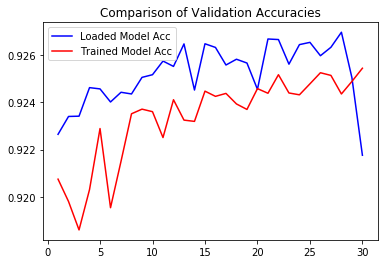

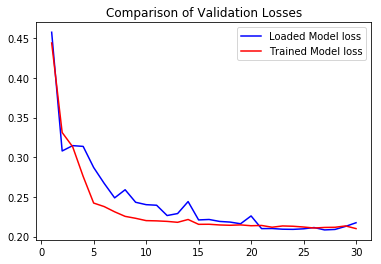

<Figure size 432x288 with 0 Axes>

In [15]:
loaded_acc = loaded_hist['val_acc']
model_acc = model_history['val_acc']
epochs = range(1, len(model_acc) + 1)
plt.plot(epochs, loaded_acc, 'b', label='Loaded Model Acc')
plt.plot(epochs, model_acc, 'r', label='Trained Model Acc')
plt.title('Comparison of Validation Accuracies')
plt.legend()
plt.figure()

# Optional: save plot
#Todo

loaded_loss = loaded_hist['val_loss']
model_loss = model_history['val_loss']
plt.plot(epochs, loaded_loss, 'b', label='Loaded Model loss')
plt.plot(epochs, model_loss, 'r', label='Trained Model loss')
plt.title('Comparison of Validation Losses')
plt.legend()
plt.figure()

# Optional: save plot
#Todo

plt.show()

###### Metric Analysis

In [ ]:
import keras.backend as K

np.set_printoptions(threshold=np.nan)

def acc_metric(y_true, y_pred):
    return K.mean(K.equal(K.argmax(y_true, axis = -1), K.argmax(y_pred, axis = -1)))

np.array(K.round(preds[:5]))

acc = acc_metric(test_labels, preds)

print(np.array(acc))

preds = model.predict(test_img)

preds = np.argmax(preds, axis=-1)/15

print(preds)